# Logistic Regression

Using features selected through EDA:
- worst concave points
- worst area
- worst texture

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
feature_names = data.feature_names
features = ['worst concave points', 'worst area', 'worst texture']
features_indices = [list(feature_names).index(name) for name in features]

X = data.data[:, features_indices]  
y = data.target

# training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print("Test data")
print(f"Total number of samples {len(y_test)}")
print(f"Number of positive samples: {sum(y_test)}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

print("\nAccuracy:", score)


Test data
Total number of samples 143
Number of positive samples: 89

Accuracy: 0.965034965034965


# Random Forest

Using `RandomizedSearchCV`

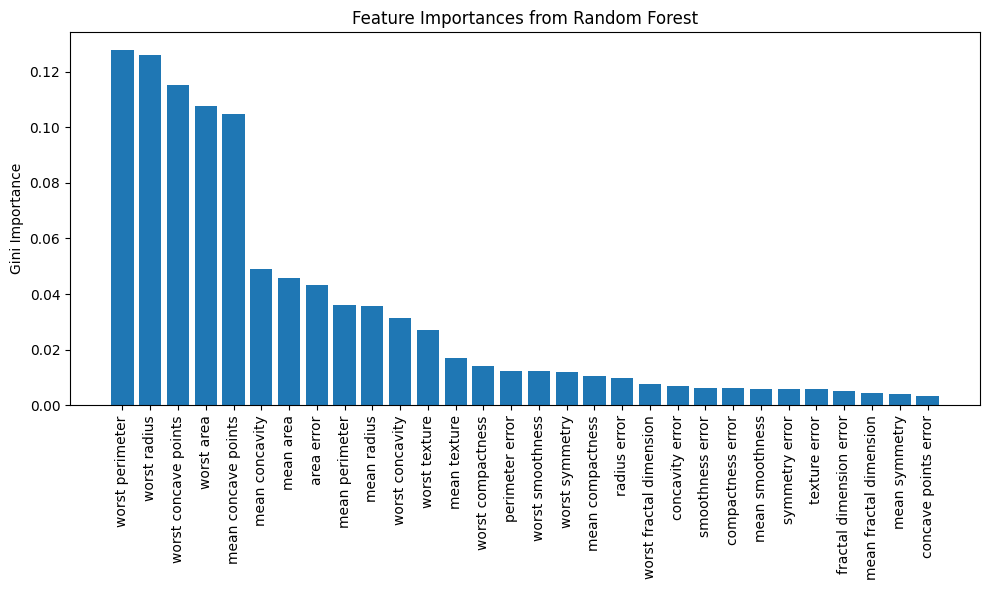

Top 13 features: ['worst perimeter' 'worst radius' 'worst concave points' 'worst area'
 'mean concave points' 'mean concavity' 'mean area' 'area error'
 'mean perimeter' 'mean radius' 'worst concavity' 'worst texture'
 'mean texture']
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best CV Accuracy: 0.9717920656634748
Test Accuracy: 0.986013986013986


In [19]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Testing different hyperparameters


# Loading breast cancer data
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# Split data into 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

temp_model = RandomForestClassifier(random_state=123)

###
# Train model
temp_model.fit(X_train, y_train)

###

# Retrieve importance values (Gini Importance)
importance_values = temp_model.feature_importances_

# Sort in descending order
indicesOfSortedValues = np.argsort(importance_values)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_values)), importance_values[indicesOfSortedValues], align='center')
plt.xticks(range(len(importance_values)), breast_cancer.feature_names[indicesOfSortedValues], rotation=90)
plt.ylabel("Gini Importance")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

n = 13

# Select top n features
selectedFeaturesIndicies = indicesOfSortedValues[:n]


feature_names = breast_cancer.feature_names
top_feature_names = feature_names[selectedFeaturesIndicies]
print(f"Top {n} features:", top_feature_names)


# new x train with selected features
new_X_train = X_train[:, selectedFeaturesIndicies]
new_X_test = X_test[:, selectedFeaturesIndicies]

###

# parameters to modify
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


model = RandomForestClassifier(random_state=123)

# grid search
grid_search = RandomizedSearchCV(estimator=model,
                           param_distributions=param_dist,
                           n_iter=100,
                           random_state=123,
                           cv=5,          # 5-fold cross-validation
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

# fitting to diferent models
result = grid_search.fit(new_X_train, y_train)

# Best parameters and score
print("Best Params:", result.best_params_)

# Average accuracy of the 5 cross folds
print("Best CV Accuracy:", result.best_score_)

# Evaluate on test set
best_model = result.best_estimator_
print("Test Accuracy:", best_model.score(new_X_test, y_test))
